# Temp Scaling para calibración de clasificadores multiclase

In [1]:
import os
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense

from utils.ops import onehot_encode
from utils.data import get_cifar3, get_cifarn
from utils.metrics import neg_log_likelihood, accuracy
from utils.visualization import plot_pdf_triplex, plot_prob_triplex
from calibrators import PAVCalibrator, NiceCalibrator, TempScalingCalibrator

In [2]:
%matplotlib inline

## Predicciones simuladas:

Simulamos muestras para un problema de clasificación de 3 clases. Generamos tanto la distribución objetivo, o *groundtruth* como las probabilidades de salida del supuesto clasificador.

### Ejemplo sencillo:

In [3]:
## Groundtruth
n_muestras = 500

target = np.random.randint(3, size=(n_muestras,))
target = onehot_encode(target)

In [4]:
## Probabilidades

noise = np.random.randn(n_muestras, 3) * 0.3
scale = 0.8

logits = scale * (target + noise)
probs = softmax(logits, axis=1)

Visualización de las probabilidades en el 2-símplex:

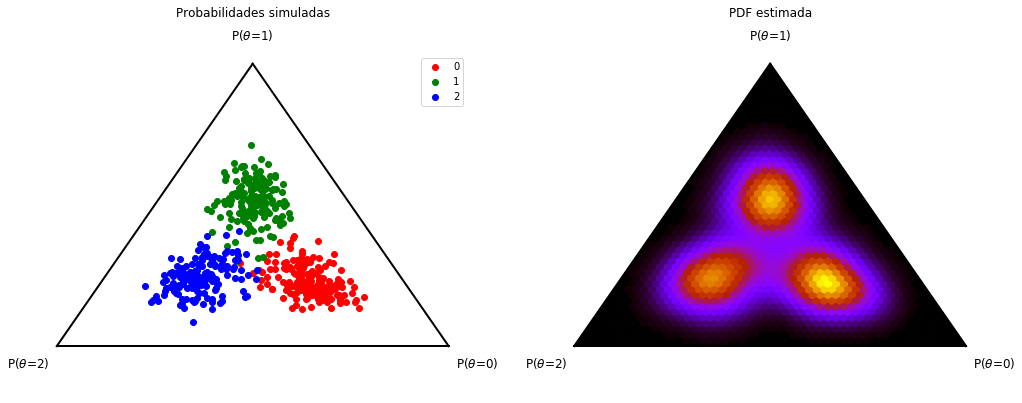

In [5]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
ax_arr[0] = plot_prob_triplex(probs, target=target, ax=ax_arr[0], title='Probabilidades simuladas', fontsize=12);
ax_arr[1] = plot_pdf_triplex(probs, ax=ax_arr[1], title='PDF estimada', fontsize=12);
plt.show()

In [6]:
## APLICAR TEMP SCALING

### Ejemplo complicado
 Usar rotaciones

###  CIFAR3:

* Visualizar CIFAR3
* Cargar CNN
    * Visualizar probabilidades en triplex
* Calibrar
    * Visualizar probabilidades en triplex
    
**DUDA**: Reliability plots¿?¿?